In [45]:
import pandas #ipython notebook
titanic = pandas.read_csv("titanic_train.csv")
# print(titanic.head(3))
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [46]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [47]:
print(titanic["Sex"].unique())

# Replace all the occurences of male with the number 0.
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1


['male' 'female']


In [48]:
print(titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [49]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression  # 这是线性回归
# Sklearn also has a helper that makes it easy to do cross validation
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
print(titanic.shape)
# kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
kf = KFold(n_splits=3, random_state=1)

predictions = []
for train, test in kf.split(titanic):  # titanic.shape[0]  单例数组array（891）不能被视为有效集合
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    print(train_predictors.shape)
    # The target we're using to train the algorithm.
    train_target = titanic["Survived"].iloc[train]
    print(train_target.shape)
    # Training the algorithm using the predictors and target.
    # .fit就是把刚才选择的算法应用到我们的数据上，在当前的数据上去训练我们的回归模型
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    # print(titanic[predictors].iloc[test,:])
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    print(type(test_predictions))
    print(test_predictions.shape)
    predictions.append(test_predictions)
    print(len(predictions))
    print(type(predictions))
print(len(predictions))
# print(predictions)

(891, 12)
(594, 7)
(594,)
<class 'numpy.ndarray'>
(297,)
1
<class 'list'>
(594, 7)
(594,)
<class 'numpy.ndarray'>
(297,)
2
<class 'list'>
(594, 7)
(594,)
<class 'numpy.ndarray'>
(297,)
3
<class 'list'>
3


In [50]:
print(type(predictions))
import numpy as np


# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
# numpy提供了numpy.concatenate((a1,a2,...), axis=0)函数。能够一次完成多个数组的拼接。其中a1,a2,...是数组类型的参数
predictions = np.concatenate(predictions, axis=0)  # #axis=1表示对应行的数组进行拼接
print(type(predictions))
print(predictions.shape)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
# accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(predictions[predictions == titanic["Survived"]])
accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

<class 'list'>
<class 'numpy.ndarray'>
(891,)
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1

In [52]:
# from sklearn import cross_validation
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression  # 逻辑回归，多用来作分类
# Initialize our algorithm
alg = LogisticRegression(random_state=1, solver = 'liblinear')
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
# scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# cross_val_score(model_name, X, y，cv=k)
# 作用：验证某个模型在某个训练集上的稳定性，输出k个预测精度
# K折交叉验证（k-fold）把初始训练样本分成k份，其中（k-1）份被用作训练集，剩下一份被用作评估集，这样一共可以对分类器做k次训练，并且得到k个训练结果
# Take the mean of the scores (because we have one for each fold)
# 取分数的平均值（因为每一折我们都有一个）
print(scores.mean())

0.7878787878787877


In [53]:
# titanic_test = pandas.read_csv("test.csv")
titanic_test = pandas.read_csv("titanic_train.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [54]:
# from sklearn import cross_validation
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# n_estimators=10 要用多少棵树来构造森林
# 树的节点分裂停止的条件
# min_samples_split=2  少于样本指定的参数就不再分了
# min_samples_leaf=1  最小的叶子节点的个数 

# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
# kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
kf = model_selection.KFold(n_splits=3, random_state=1)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf.split(titanic))
# cross_val_score(model_name, X, y，cv=k)
# 作用：验证某个模型在某个训练集上的稳定性，输出k个预测精度

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.7856341189674523


In [55]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
# kf = cross_validation.KFold(titanic.shape[0], 3, random_state=1)
kf = model_selection.KFold(n_splits=3, random_state=1)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf.split(titanic))

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.8148148148148148


In [56]:
# Generating a familysize column
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [57]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    # 使用正则表达式搜索标题。 标题始终由大写字母和小写字母组成，并以句点结尾。
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    # 如果标题存在，请提取并返回。
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
# 获取所有标题并打印每个标题出现的频率
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
# 将每个标题映射到一个整数。 一些标题非常罕见，并且压缩成与其他标题相同的代码
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
# 验证我们是否已转换所有内容
print(pandas.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Don           1
Sir           1
Mme           1
Countess      1
Ms            1
Lady          1
Jonkheer      1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


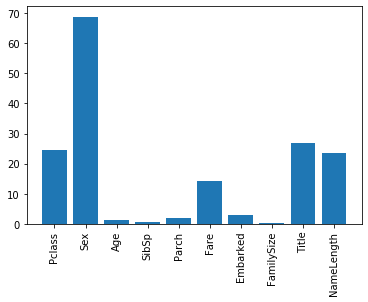

In [58]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif  # 根据k个最高分数选择功能
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# Perform feature selection
# 执行功能选择
# score_func : callable，函数取两个数组X和y，返回一对数组（scores, pvalues）或一个分数的数组。默认函数为f_classif，默认函数只适用于分类函数
# k：int or "all", optional, default=10。所选择的topK个特征。“all”选项则绕过选择，用于参数搜索
# f_classif 标签/功能之间的ANOVA F值用于分类任务
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
# 获取每个特征的原始p值，然后从p值转换为分数
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
# 绘制分数。 看看“ Pclass”，“ Sex”，“ Title”和“ Fare”如何最好？
plt.bar(range(len(predictors)), scores)
# 竖值条形图  bar(x, height, width=0.8, bottom=None, , align='center', data=None, kwargs*)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')  # rotation代表lable显示的旋转角度
plt.show()

# Pick only the four best features.
# predictors = ["Pclass", "Sex", "Fare", "Title"]
predictors = ["Pclass", "Sex", "Fare", "Title", "NameLength"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier  # ensemble方法其实就是集成方法
# 在sacikit-learn中，GradientBoostingClassifier为GBDT的分类类， 而GradientBoostingRegressor为GBDT的回归类
# 首先，我们来看boosting框架相关的重要参数
# n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，
# 又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑
# learning_rate: 即每个弱学习器的权重缩减系数ν，也称作步长
# alpha：这个参数只有GradientBoostingRegressor有，当我们使用Huber损失"huber"和分位数损失“quantile”时，需要指定分位数的值。默认是0.9，如果噪音点较多，可以适当降低这个分位数的值
# loss: 即我们GBDT算法中的损失函数。分类模型和回归模型的损失函数是不一样的
import numpy as np

# The algorithms we want to ensemble.
# 我们要集成的算法
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
# 我们将更多线性预测变量用于logistic回归，而所有使用梯度提升分类器的变量
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]],
    [LogisticRegression(random_state=1, solver = 'liblinear'), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]
# algorithms = [
#     [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Fare", "Title", "NameLength"]],
#     [LogisticRegression(random_state=1, solver = 'liblinear'), ["Pclass", "Sex", "Fare", "Title", "NameLength"]]
# ]

# Initialize the cross validation folds
# kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
kf = KFold(n_splits=3, random_state=1)
# 这里的话，说实话这个交叉验证导致了结果更差，因为交叉验证我觉得有一点防止过拟合的意思，每个样本既是训练集又是验证集

predictions = []
for train, test in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    # 对每个折页的每种算法进行预测
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        # 使算法适合训练数据
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # 选择并预测测试结果
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        # .astype（float）是将Dataframe转换为所有float并避免sklearn错误所必需的
        print(alg.predict_proba(titanic[predictors].iloc[test,:]).shape)
        # predict_proba返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        print(test_predictions.shape)
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    # 使用简单的整合方案-只需对预测取平均值即可得出最终分类
    # test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions = (full_test_predictions[0] * 4 + full_test_predictions[1]) / 5
    print(test_predictions.shape)
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    # 大于.5的任何值均假定为1预测，小于.5的任何值为0预测
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    print(test_predictions.shape)
    predictions.append(test_predictions)

# Put all the predictions together into one array.
# 将所有预测汇总到一个数组中
predictions = np.concatenate(predictions, axis=0)
print(predictions.shape)

# Compute accuracy by comparing to the training data.
# 通过与训练数据进行比较来计算准确性
# accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(predictions[predictions == titanic["Survived"]])
accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)


(297, 2)
(297,)
(297, 2)
(297,)
(297,)
(297,)
(297, 2)
(297,)
(297, 2)
(297,)
(297,)
(297,)
(297, 2)
(297,)
(297, 2)
(297,)
(297,)
(297,)
(891,)
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 

In [40]:
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title.
print(pandas.value_counts(titanic_test["Title"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]
titanic_test["NameLength"] = titanic["Name"].apply(lambda x: len(x))



1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Title, dtype: int64


In [44]:
# predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title"]
# predictors = ["Pclass", "Sex", "Fare", "Title", "NameLength"]
# predictors = ["Pclass", "Sex", "Fare", "Title"]
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# Boosting 算法善于处理偏差(bias)方差(variance)问题（trade-off）
# Boosting 是一个以融合原则工作的序列技术，将一系列的弱学习器进行组合从而提升预测的准确率。模型第t次迭代的结果，是基于前t-1次的结果进行赋权
# 机器学习之Gradient Tree Boosting中GBDT-- GradientBoostingClassifier
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1, solver = 'liblinear'), predictors]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    # 使用完整的训练数据拟合算法
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    # 使用测试数据集进行预测。 我们必须将所有列都转换为浮点数以避免错误。
    print(alg.predict_proba(titanic_test[predictors]).shape)
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    print(predictions.shape)
    full_predictions.append(predictions)
    print(type(full_predictions))
    print(len(full_predictions))

# The gradient boosting classifier generates better predictions, so we weight it higher.
# 梯度提升分类器产生更好的预测，因此我们对其加权更高
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
print(type(predictions))  # 就是说list类型和list类型相加就变成了numpy.ndarray类型了啊
print(predictions.shape)
# print(predictions[predictions])
## 用作索引的数组必须为整数（或布尔值）类型
# print(predictions[predictions <= .5])
predictions[predictions <= .5] = 0  # 就是根据布尔值类型数组索引赋值，还是没什么问题的
predictions[predictions > .5] = 1
# predictions[test_predictions > .5] = 1
# 布尔索引与维度0上的索引数组不匹配； 维度是891，但相应的布尔维度是297

print(predictions == titanic["Survived"])  # 这里获得的会是一个布尔值类型数组
print(predictions[predictions == titanic["Survived"]])  # 这应该很清晰了吧，就是根据布尔值类型数组里布尔值为Ture选取predictions里预测正确的
print(len(predictions[predictions == titanic["Survived"]]))
print(predictions[predictions == titanic["Survived"]].shape)
print(sum(predictions[predictions == titanic["Survived"]]))  # 下面列出的输出结果一目了然，用sum相加是错误的
print(type(predictions[predictions == titanic["Survived"]]))
# accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
# sum不是相加的意思么，就是说预测正确的所有标签相加，但是0这个标签是你加不上的啊，所以少加了预测对的但是预测不能够获救的，当然就不对了啊
accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

(891, 2)
(891,)
<class 'list'>
1
(891, 2)
(891,)
<class 'list'>
2
<class 'numpy.ndarray'>
(891,)
0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14     False
15      True
16      True
17     False
18     False
19      True
20      True
21     False
22      True
23     False
24      True
25     False
26      True
27      True
28      True
29      True
       ...  
861     True
862     True
863     True
864     True
865     True
866     True
867     True
868     True
869     True
870     True
871     True
872     True
873     True
874     True
875     True
876     True
877     True
878     True
879     True
880     True
881     True
882    False
883     True
884     True
885     True
886     True
887     True
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.